In [2]:
import sys
import timeit
import matplotlib.pyplot as plt



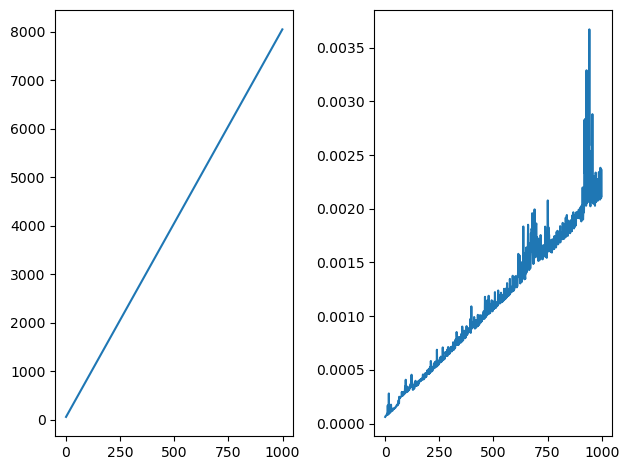

In [3]:
# 定义一个空间复杂度为O(n)的算法

def f1(n: int):
    a = [1] * n
    return a

# 绘制空间复杂度图
space = [sys.getsizeof(f1(i)) for i in range(1000)]
plt.subplot(121)
plt.plot(space) # O(n)

# 绘制时间复杂度图
time = [timeit.timeit(stmt=f"f1({i})", setup="from __main__ import f1", number=1000) for i in range(1000)]
plt.subplot(122)
plt.plot(time) # O(1)

plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:170:

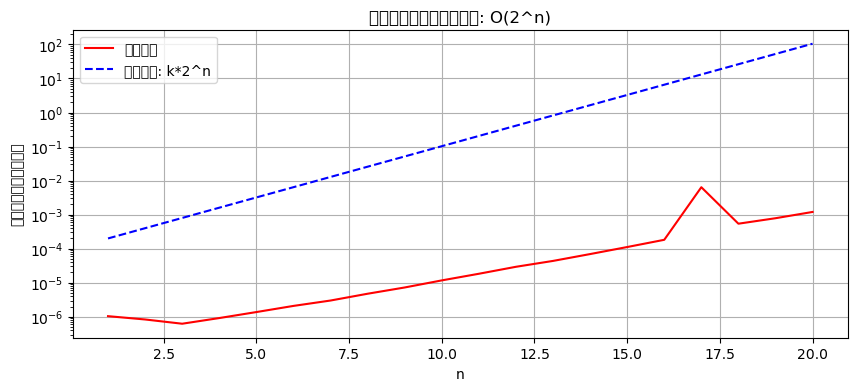

In [4]:
# 斐波那契数列函数（递归实现，时间复杂度O(2^n)）
def f2(n: int):
    if n <= 1:
        return 1
    return f2(n-1) + f2(n-2)

# 测量时间复杂度（指数增长）
n_values = range(1, 21)  # 限制n的范围，避免计算时间过长
times = [timeit.timeit(lambda: f2(n), number=1) for n in n_values]

# 绘制时间复杂度图（对数坐标更清晰）
plt.figure(figsize=(10, 4))
plt.plot(n_values, times, 'r-', label='实际耗时')
plt.plot(n_values, [0.0001 * (2 ** n) for n in n_values], 'b--', label='理论曲线: k*2^n') 
plt.yscale('log')  # 对数坐标显示指数增长
plt.xlabel('n')
plt.ylabel('时间（秒，对数刻度）')
plt.title('斐波那契递归时间复杂度: O(2^n)')
plt.legend()
plt.grid()
plt.show()


In [5]:
def recur(n):
    """尾递归"""
    # 终止条件
    if n == 0:
        return res
    # 递归调用
    return n + recur(n - 1)

def tail_recur(n, res):
    """尾递归"""
    # 终止条件
    if n == 0:
        return res
    # 尾递归调用
    return tail_recur(n - 1, res + n)




In [6]:
# 写一个函数，实现对某个字符串中字符的全排列，并输出所有排列结果列表

def permutation(S):
    n = len(S)
    if n ==  0:
        return [""]

    res = set()
    for i, s in enumerate(S):
        rest = S[:i] + S[i+1:]
        for perm in permutation(rest):
            res.add(s + perm)
    
    return res

# 示例
permutation("abc")

{'abc', 'acb', 'bac', 'bca', 'cab', 'cba'}

In [7]:
# 写一个函数，实现对某个字符串中字符的全排列，并输出所有排列结果列表
# tail recursion
def permutation(S, res):
    n = len(S)
    if n ==  0:
        return [""]

    res = set()
    for i, s in enumerate(S):
        rest = S[:i] + S[i+1:]
        for perm in permutation(rest):
            res.add(s + perm)
    
    return res

# 示例
permutation("abc")

TypeError: permutation() missing 1 required positional argument: 'res'

In [ ]:
def permutation_tail(S, current="", result=None):
    """
    尾递归实现字符串全排列
    Args:
        S: 剩余待排列的字符
        current: 当前已构建的排列字符串
        result: 存储所有排列结果的集合
    Returns:
        所有可能的排列集合
    """
    if result is None:
        result = set()
    if len(S) == 0:
        result.add(current)
        return result
    
    for i in range(len(S)):
        # 尾递归调用：处理剩余字符，更新当前排列
        permutation_tail(S[:i] + S[i+1:], current + S[i], result)
    
    return result

# 示例
print(permutation_tail("abc"))


{'bac', 'acb', 'bca', 'cab', 'abc', 'cba'}


In [ ]:
# 练习

def factorial(n):
    """
    计算给定整数的阶乘。
    
    参数:
        n (int): 非负整数
    
    返回:
        int: n的阶乘结果
        或 str: 当n为负数或非整数时返回"ArithmeticError"
    
    示例:
        >>> factorial(5)
        120
        >>> factorial(0)
        1
        >>> factorial(-1)
        'ArithmeticError'
    """
    if not (isinstance(n, int) and n >= 0):
        return "ArithmeticError"

    if n == 0:
        return 1
    return n * factorial(n - 1)

def factorial_tail(n, res=1):
    """
    计算数字的尾递归阶乘。
    
    参数:
        n (int): 要计算阶乘的非负整数
        res (int): 累积结果，默认为1
    
    返回:
        int: n的阶乘结果
        str: 如果n不是非负整数，返回"ArithmeticError"
    
    示例:
        >>> factorial_tail(5)
        120
        >>> factorial_tail(-1)
        'ArithmeticError'
    """
    if not (isinstance(n, int) and n >= 0):
        return "ArithmeticError"
    if n == 0:
        return res
    return factorial_tail(n - 1, n * res)

# 示例

n = 5

factorial(n), factorial_tail(n, res=1)


(120, 120)

In [ ]:
def fib(n):
    """
    计算斐波那契数列的第n项
    
    参数:
        n (int): 要计算的斐波那契数列项数
    
    返回:
        int: 斐波那契数列的第n项数值
    """
    使用尾递归计算斐波那契数列的第n项
    
    Args:
        n: 要计算的斐波那契数列项数
        a: 当前斐波那契值(默认0)
        b: 下一个斐波那契值(默认1)
    
    Returns:
        斐波那契数列的第n项值
    """
    """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

def fib_tail(n, a=0, b=1):
    if n == 0:
        return a
    return fib_tail(n - 1, b, a + b)

# 示例
n = 5
fib(n), fib_tail(n)

(5, 5)

In [ ]:
def reverse(s:str):
    """
    反转字符串
    
    参数:
        s (str): 需要反转的字符串
    
    返回:
    """
    递归反转字符串的尾部实现
    
    Args:
        s (str): 要反转的输入字符串
        res (str): 累积的反转结果，默认为空字符串
    
    Returns:
        str: 反转后的字符串
    
    Note:
        这是一个尾递归实现，每次递归处理字符串的最后一个字符
    """
        str: 反转后的字符串
    
    示例:
        >>> reverse("hello")
        'olleh'
    """
    n = len(s)
    if n == 0:
        return ""
    
    return s[-1] + reverse(s[:-1])

def reverse_tail(s:str, res=""):
    n = len(s)
    if n == 0:
        return res
    
    return reverse_tail(s[:-1], res + s[-1])

# 示例
s = "abcdef"
reverse(s), reverse_tail(s)


('fedcba', 'fedcba')

In [ ]:
def lsum(ls):
    """
    递归计算列表元素之和
    
    参数:
        ls (list): 包含数字的列表
    """
    使用尾递归计算列表元素的和
    
    参数:
        ls: 要计算的数字列表
        res: 累加结果(默认为0)
    
    返回:
        列表中所有元素的和
    
    注意:
        这是一个尾递归实现，当列表为空时返回累加结果
    """
    
    返回:
        int/float: 列表中所有元素的和。空列表返回0
    
    示例:
        >>> lsum([1, 2, 3])
        6
        >>> lsum([])
        0
    """
    if len(ls) == 0:
        return 0
    return lsum(ls[1:]) + ls[0]

def lsum_tail(ls, res=0):
    if len(ls) == 0:
        return res
    return lsum_tail(ls[1:], res + ls[0])


# 示例
ls = [1, 2, 3, 4, 5]
lsum(ls), lsum_tail(ls, res=0)

(15, 15)

In [ ]:
def to_binary(n:int):
    """
    将整数转换为二进制字符串表示
    
    参数:
        n (int): 要转换的十进制整数
    
    返回:
        str: 二进制字符串表示。当输入为0时返回空字符串，非整数输入返回"ArithmeticError"
    
    示例:
        >>> to_binary(5)
        '101'
        >>> to_binary(0)
        ''
        >>> to_binary('a')
        'ArithmeticError'
    """
    if not isinstance(n, int):
        return "ArithmeticError"
 
    if n == 0:
        return ""

    return to_binary(n // 2) + str(n % 2)


def to_binary_tail(n:int, res=""):
    """
    将十进制整数转换为二进制字符串（尾递归实现）
    
    参数:
        n (int): 要转换的十进制整数
        res (str): 累积的二进制结果字符串（默认空字符串）
    
    返回:
        str: 二进制字符串表示形式，若输入非整数则返回"ArithmeticError"
    
    注意:
        使用尾递归优化实现，避免栈溢出风险
    """
    if not isinstance(n, int):
        return "ArithmeticError"
 
    if n == 0:
        return res
    
    return to_binary_tail(n // 2, str(n % 2) + res)



# 示例
n = 8
to_binary(n), to_binary_tail(n)

('1000', '1000')

# 📘 Python 数据类型性能知识笔记

本笔记总结了 Python 中常见的数据类型及其时间复杂度、空间效率、适用场景等性能特性。

---

## 🧩 一、标量类型（不可变）

| 类型       | 描述         | 时间复杂度       | 空间效率 | 特性说明 |
|------------|--------------|------------------|----------|----------|
| `int`      | 整数（任意精度） | 算术操作 $O(1)$（小数） | 较高     | 支持大整数 |
| `float`    | 双精度浮点数 | 算术操作 $O(1)$     | 高效     | IEEE 754 |
| `bool`     | 布尔值       | 与 `int` 兼容      | 极小     | `True == 1` |
| `NoneType` | 表示“空”或无 | -                | 极小     | 只有一个 `None` |
| `str`      | 字符串（不可变） | 索引 $O(1)$，拼接 $O(n)$ | 紧凑     | 推荐用 `join` 拼接 |

---

## 🧱 二、序列类型（有序）

| 类型     | 描述       | 索引 | 插入 | 删除 | 追加 | 空间 | 特性 |
|----------|------------|------|------|------|------|------|------|
| `list`   | 动态数组   | $O(1)$ | $O(n)$ | $O(n)$ | $O(1)$ 均摊 | 较高 | 可变、支持切片 |
| `tuple`  | 不可变数组 | $O(1)$ | ❌   | ❌   | ❌   | 更低 | 可哈希，适合作 key |
| `range`  | 懒加载范围 | $O(1)$ | ❌   | ❌   | ❌   | 极低 | 不占空间，迭代快 |

---

## 🎯 三、集合类型（无序、不重复）

| 类型         | 查找 | 插入 | 删除 | 空间效率 | 特性 |
|--------------|------|------|------|----------|------|
| `set`        | $O(1)$ 平均 | $O(1)$ | $O(1)$ | 中等 | 基于哈希表，唯一性 |
| `frozenset`  | 同上 | ❌   | ❌   | 更小 | 不可变、可哈希 |

---

## 🧠 四、映射类型（键值对）

| 类型             | 描述         | 查找 | 插入 | 删除 | 特性 |
|------------------|--------------|------|------|------|------|
| `dict`           | 哈希表映射   | $O(1)$ | $O(1)$ | $O(1)$ | 插入顺序自 3.7 起保留 |
| `defaultdict`    | 自动初始化字典 | $O(1)$ | $O(1)$ | $O(1)$ | 常用于计数器 |
| `OrderedDict`    | 有序字典     | $O(1)$ | $O(1)$ | $O(1)$ | 插入顺序保持 |
| `ChainMap`       | 链式映射     | $O(n)$ | $O(1)$ | $O(n)$ | 多作用域合并映射 |

---

## ⚙️ 五、字节序列与内存视图

| 类型           | 描述            | 特性与用途         |
|----------------|-----------------|--------------------|
| `bytes`        | 不可变字节串    | 类似字符串，适用于网络/文件 |
| `bytearray`    | 可变字节串      | 支持原地修改       |
| `memoryview`   | 内存视图对象    | 零拷贝切片，高性能操作 |

---

## 🔁 六、队列、栈、堆（来自 `collections` / `queue`）

| 类型             | 描述           | 时间复杂度 | 特性 |
|------------------|----------------|-------------|------|
| `deque`          | 双端队列       | 两端操作 $O(1)$ | 替代 list 插头部 |
| `queue.Queue`    | 线程安全 FIFO  | 加锁实现    | 多线程 |
| `LifoQueue`      | 线程安全栈     | -           | 多线程 |
| `PriorityQueue`  | 线程安全堆     | 插入/弹出 $O(\log n)$ | 基于 heap |
| `heapq`          | 最小堆接口     | 同上        | 基于列表原地维护堆 |

---

## 🧮 七、常见操作的时间复杂度对比表

| 操作                  | `list` | `tuple` | `dict` | `set`  | `str`  |
|------------------------|--------|---------|--------|--------|--------|
| 索引访问 `x[i]`        | $O(1)$ | $O(1)$  | ❌     | ❌     | $O(1)$ |
| 成员检查 `x in y`      | $O(n)$ | $O(n)$  | $O(1)$ | $O(1)$ | $O(n)$ |
| 插入元素               | $O(n)$ | ❌      | $O(1)$ | $O(1)$ | ❌     |
| 删除元素               | $O(n)$ | ❌      | $O(1)$ | $O(1)$ | ❌     |
| 尾部追加 `append()`    | $O(1)$ | ❌      | ❌     | ❌     | ❌     |

---

## 🧠 八、可变与不可变类型总结

| 类型分类 | 数据类型                             |
|----------|--------------------------------------|
| 不可变   | `int`, `float`, `bool`, `str`, `tuple`, `frozenset`, `bytes` |
| 可变     | `list`, `dict`, `set`, `bytearray`, `deque` |

---

## 🧰 九、选择建议（按使用场景）

| 任务需求         | 推荐数据类型     | 原因说明         |
|------------------|------------------|------------------|
| 顺序可变序列     | `list`           | 支持索引、切片、排序 |
| 不可变定长序列   | `tuple`          | 占空间小，可用作键 |
| 去重与集合运算   | `set`            | 唯一元素、交并补 |
| 映射关系存储     | `dict`           | 键值查找高效 |
| 高效插头/弹尾操作 | `deque`          | 双端 O(1) 操作 |
| 最小堆           | `heapq`          | $O(\log n)$ 插删 |
| 网络数据处理     | `bytes` / `bytearray` | 高效字节操作 |

---

## 📌 十、其他补充

- Python 中所有对象都是引用传递，尤其是**可变对象**的修改会影响外部；
- 不同数据结构在 **存储效率** 和 **操作复杂度** 上权衡不同；
- `collections`、`heapq`、`queue` 提供了更灵活的数据结构工具；
- `str`, `tuple`, `frozenset` 等不可变类型可以用于 `dict` 的 key 或 `set` 的元素。

---

> 🧠 建议：在实际项目中，根据数据操作的频率、查询/插入性能要求、存储大小等维度选择最适合的数据结构。

# 📘 线性数据结构学习笔记

线性数据结构是数据结构中最基础、最常用的部分，特点是：**元素之间具有线性顺序关系**。本笔记包括定义、分类、操作、复杂度、Python 实现等内容。

---

## 🧩 一、线性数据结构概述

### ✅ 定义

线性数据结构指的是数据元素呈**一对一线性关系**排列的数据结构。

### ✅ 特点

- 每个元素只有一个前驱和一个后继（除首尾元素）
- 存储方式有：**顺序存储（数组）** 与 **链式存储（链表）**

---

## 📂 二、线性数据结构分类与说明

| 数据结构 | 是否动态扩展 | 是否支持索引 | 是否支持快速插入/删除 | 应用场景 |
|-----------|----------------|----------------|------------------------|----------|
| 数组 Array | ❌ 固定容量     | ✅ O(1)         | ❌ 插入/删除 O(n)       | 静态数据、高效索引 |
| 列表 List  | ✅ 动态扩展     | ✅ O(1)         | ❌ 插入/删除 O(n)       | Python 内置 list |
| 链表 Linked List | ✅         | ❌ O(n)         | ✅ 插入/删除 O(1)（已知节点） | 内存非连续、动态变化 |
| 栈 Stack   | ✅ 后进先出     | ❌              | ✅ push/pop O(1)        | 函数调用、括号匹配 |
| 队列 Queue | ✅ 先进先出     | ❌              | ✅ enqueue/dequeue O(1) | 排队、任务调度 |
| 双端队列 Deque | ✅ 两端操作 | ❌              | ✅ 两端插入删除 O(1)    | 缓冲区、滑动窗口 |

---

## 🚀 三、常见操作与时间复杂度对比

| 操作         | 数组 | 链表 | 栈   | 队列 | Deque |
|--------------|------|------|------|------|-------|
| 访问元素     | O(1) | O(n) | ❌   | ❌   | ❌     |
| 插入头部     | O(n) | O(1) | push | O(1) | O(1)  |
| 插入尾部     | O(1) | O(n) | ❌   | enqueue | O(1) |
| 删除头部     | O(n) | O(1) | pop  | dequeue | O(1) |
| 删除尾部     | O(1) | O(n) | ❌   | ❌   | O(1)  |
| 搜索元素     | O(n) | O(n) | ❌   | ❌   | O(n)  |

---

## 🧠 四、核心数据结构详解

### 1. 数组 Array（Python中为 list）

- 存储方式：连续内存
- 优点：索引访问快
- 缺点：插入/删除慢、容量固定（底层动态扩容）

### 2. 链表 Linked List

- 分为：单链表、双向链表、循环链表
- 节点结构：`data + next`（双向链表加上 prev）
- 优点：插入删除灵活，不需要连续内存
- 缺点：不支持下标访问，遍历性能差

### 3. 栈 Stack

- 特性：后进先出（LIFO）
- 操作：
  - `push(x)` 入栈
  - `pop()` 出栈
  - `peek()` 取栈顶元素
- 应用：函数递归、表达式求值、括号匹配

### 4. 队列 Queue

- 特性：先进先出（FIFO）
- 操作：
  - `enqueue(x)` 入队
  - `dequeue()` 出队
- 应用：消息排队、线程任务队列、广度优先搜索

### 5. 双端队列 Deque

- 特性：两端都可插入删除
- Python 提供：`collections.deque`
- 应用：滑动窗口、最近最少使用缓存（LRU）

---

## 🔧 五、Python 实现方法

### ✅ 栈
```python
stack = []
stack.append(1)  # push
x = stack.pop()  # pop
```
### ✅ 队列（推荐用 collections.deque）
```python
from collections import deque
queue = deque()
queue.append(1)      # enqueue
x = queue.popleft()  # dequeue
```
### ✅ 双端队列
```python
dq = deque()
dq.appendleft(1)     # 头部插入
dq.append(2)         # 尾部插入
x = dq.pop()         # 尾部删除
y = dq.popleft()     # 头部删除
```
### ✅ 单链表（简单实现）
```python
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def insert_front(self, val):
        node = Node(val)
        node.next = self.head
        self.head = node
```

In [ ]:
names = [
    "张伟", "王芳", "李强", "刘洋", "陈杰",
    "赵敏", "孙丽", "周鹏", "吴婷"
]

from collections import deque
names = deque(names)

cnt = 0
epochs = 0
while len(names) > 1:
	eliminates = []
	cnt += len(names)
	for i in range(cnt - len(names) + 1, cnt + 1):
		p = names.pop()
		if i % 3 != 0:	
			names.appendleft(p)
		else:
			eliminates.append(p)
	epochs += 1
	print("第{} 轮结束，剩下的人有{}, 淘汰的人有{}".format(epochs, names, eliminates))
print(f"获胜者为{names}")



第1 轮结束，剩下的人有deque(['王芳', '李强', '陈杰', '赵敏', '周鹏', '吴婷']), 淘汰的人有['孙丽', '刘洋', '张伟']
第2 轮结束，剩下的人有deque(['李强', '陈杰', '周鹏', '吴婷']), 淘汰的人有['赵敏', '王芳']
第3 轮结束，剩下的人有deque(['李强', '周鹏', '吴婷']), 淘汰的人有['陈杰']
第4 轮结束，剩下的人有deque(['李强', '吴婷']), 淘汰的人有['周鹏']
第5 轮结束，剩下的人有deque(['吴婷']), 淘汰的人有['李强']
获胜者为deque(['吴婷'])


In [ ]:
def factorial(n):
    return factorial(n-1) + factorial(n-2)

# factorial(5)

In [ ]:
def f(arr, target, left, right):
    if left > right:
        return -1

    mid = (left + right) // 2
    if arr[mid] == target:
        return mid
    elif arr[mid] > target:
        return f(arr, target, left, mid - 1)
    else:
        return f(arr, target, mid + 1, right)


# 示例
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
f(arr, 2, 0, 8)
    

1

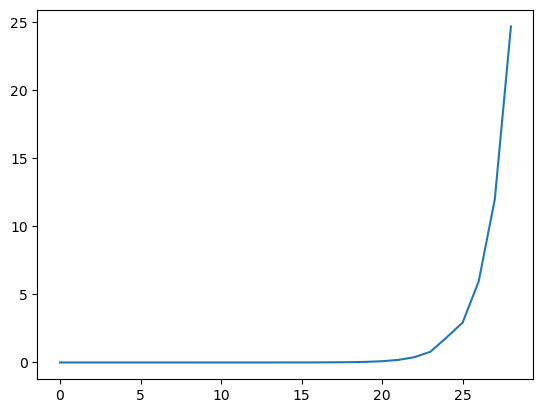

In [ ]:
def hanoi(n, source, auxiliary, target):
    if n == 1:
        # print(f"Move disk 1 from {source} to {target}")
        pass
    else:
        hanoi(n - 1, source, target, auxiliary)
        # print(f"Move disk {n} from {source} to {target}")
        hanoi(n - 1, auxiliary, source, target)

# 示例
time = [timeit.timeit(f"hanoi({i}, 'A', 'B', 'C')", setup="from __main__ import hanoi", number=1) for i in range(1, 30)]
plt.plot(time)
plt.show()


In [ ]:
def recur_sum(n:int):
    return n + recur_sum(n-1) if n > 1 else 1

# 示例
n = 100
print(recur_sum(n))

def tail_recur_sum(n:int, res=1):
    if n == 1:
        return res
    
    return tail_recur_sum(n-1, res + n)

# 示例
n = 100
print(tail_recur_sum(n))


5050
5050


In [ ]:
def transform(n:int, base=2):
    if n < base:
        return str(n) 
    return transform(n // base, base=2) + str(n % base)

# 示例
n = 25; base = 2
print(transform(n, base))


def tail_transform(n:int, res="", base=2):
    if n < base:
        return str(n) + res
    
    return tail_transform(n // base, str(n % base) + res, base=2)

# 示例
n = 25; base = 2
print(tail_transform(n, res="", base=base))

11001
11001


In [ ]:
# import turtle

# t = turtle.Turtle()
# t.forward(100)

# turtle.done()